<a href="https://colab.research.google.com/github/volgapavel/MPTHI_HW/blob/main/Popov_mpthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [24]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [25]:

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

y = y.reshape(-1, 1)

print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [26]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [28]:
def coordinate_descent(X, y, w, num_iters=1000):
    '''
    Функция реализует алгоритм координатного спуска.
    Параметры функции:
        X: матрица наблюдений
        y: целевая переменная (1D массив)
        w: вектор коэффициентов (1D массив)
        num_iters: кол-во итераций
    Функция возвращает:
        w: вектор с коэффициентами
        mse_list: список значений метрики MSE
        mae_list: список значений метрики MAE
    '''
    m = X.shape[1]  # количество признаков
    n = X.shape[0]  # количество наблюдений
    mse_list = []
    mae_list = []

    # Убедимся, что y является 1D массивом
    if y.ndim > 1:
        y = y.flatten()

    for i in range(num_iters):
        for k in range(m):
            # Вычисляем прогноз без вклада k-го признака
            h = X @ w - X[:, k] * w[k]
            # Обновляем k-й коэффициент
            numerator = X[:, k] @ (y - h)  # Скалярное произведение
            denominator = X[:, k] @ X[:, k]  # Скалярное произведение
            w[k] = numerator / denominator
        # Вычисляем метрики после обновления всех коэффициентов
        error = y - X @ w
        mse = np.mean(error ** 2)
        mae = np.mean(np.abs(error))
        mse_list.append(mse)
        mae_list.append(mae)
    return w, mse_list, mae_list

# Инициализируем параметры
w = np.zeros(X.shape[1])

# Убедимся, что y является 1D массивом
if y.ndim > 1:
    y = y.flatten()

# Запускаем алгоритм координатного спуска
w, mse_list, mae_list = coordinate_descent(X, y, w)

print(f'Коэффициенты линейной регрессии: \n {w}')
print(f'MSE: {mse_list[-1]}')  # Последнее значение MSE
print(f'MAE: {mae_list[-1]}')  # Последнее значение MAE


Коэффициенты линейной регрессии: 
 [ 41.56217205 110.13144155  73.52860638  -0.55006384]
MSE: 2.784126314510936
MAE: 1.2520112296870682


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_predict = model.predict(X)
print(model.coef_)
print(f'MSE: {metrics.mean_squared_error(y,y_predict)}')
print(f'MAE: {metrics.mean_absolute_error(y,y_predict)}')

[ 41.56217205 110.13144155  73.52860638  -0.55006384]
MSE: 2.784126314510936
MAE: 1.2520112296870676


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [88]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

**Добавим единичный столбец**

In [89]:
# добавляем в матрицу наблюдений единичный столбец
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
w = np.zeros([4, 1])

print(X.shape, y.shape)

(200, 4) (200, 1)


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [90]:
def mse_error(y, y_predict):
    '''
    Функция вычисляет среднеквадратичную ошибку MSE.
    Параметры функции:
        y: одномерный массив с реальными значениями целевой переменной
        y_predict: одномерный массив с предсказанными значениями целевой переменной
    Функция возвращает:
        значение среднеквадратичной ошибки MSE
    '''
    mse = np.mean((y - y_predict) ** 2)
    return mse


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [91]:
y_predict = np.mean(y, axis=0)

print(mse_error(y, y_predict))

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [92]:
def lin_pred(X, w):
    y = X @ w
    return y

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла)
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [93]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]  # строка с индексом train_ind
    y_pred = lin_pred(x_i, w)
    error = y_pred - y[train_ind]
    grad = x_i * error
    w_hat = w - 2 * eta * grad
    return w_hat


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [94]:
def stochastic_gradient_descent(X, y, w, eta=0.001, delta_stop=1e-9, max_iter=100_000):
    delta_w = np.inf
    mse_value_list = []
    i = 0
    while delta_w > delta_stop and i < max_iter:
        rand_index = np.random.randint(X.shape[0])

        y_pred = lin_pred(X, w)
        mse_value = mse_error(y, y_pred)
        mse_value_list.append(mse_value)

        w_hat = stoch_grad_step(X, y, w, rand_index, eta)
        delta_w = np.linalg.norm(np.array(w) - np.array(w_hat))  #np.sqrt(np.sum((w - w_hat)**2))

        i += 1
        w = w_hat
    return w, mse_value_list


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [95]:
# реализуем стохастический градиентный спуск
# Инициализируем веса нулями
w = np.zeros(X.shape[1])
w, errors = stochastic_gradient_descent(X, y, w, eta=0.001, max_iter=100_000)
print("Полученные веса:")
print(w)
print("Последнее значение ошибки MSE:")
print(errors[-1])

Полученные веса:
[14.00702946  4.02106962  2.83862029  0.02632477]
Последнее значение ошибки MSE:
52.63626444397338


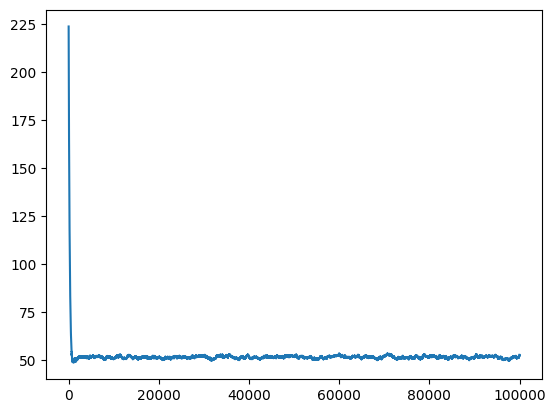

In [96]:
import matplotlib.pyplot as plt

plt.plot(range(100000), errors)

**Выведите вектор весов, к которому сошелся метод.**

In [99]:
w

array([14.00702946,  4.02106962,  2.83862029,  0.02632477])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [98]:
errors[-1]

52.63626444397338